### **Libraries**

In [198]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statistics
%matplotlib inline 
import matplotlib.pyplot as plt

import os
import tarfile
import urllib

In [207]:
from zlib import crc32
from termcolor import colored
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

For Machine Learnings

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats

### **Datasets From Devices**

In [154]:
house_data = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\housing.csv')

### **Fetch Data**

You could use your web browser to download the file and run *tar xzf housing.tgz* to decompress it and extract the *CSV file*, but it is preferable to create a small function to do that. Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines. 

In [114]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Now when you call *fetch_housing_data()*, it creates a datasets/housing directory in your workspace, downloads the *housing.tgz file*, and extracts the housing.csv file from it in this directory.

In [20]:
# Load the DATA:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Since I got a *not find such error* in this code, I will use the dataset I got from the **Datasets From Devices** blog in all future codes.

### **Quik Look at the Data Structure**

In [155]:
house_data.head() # 10 Attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [156]:
# to get quick description of the data, total number of rows, attributes type, number of NaN values
house_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [157]:
# ocean_proximity has object type, so it means that is text attribute. and  if yo want to check what and how many categories
house_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [158]:
#the method shows us a summary of the numerical attributes
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


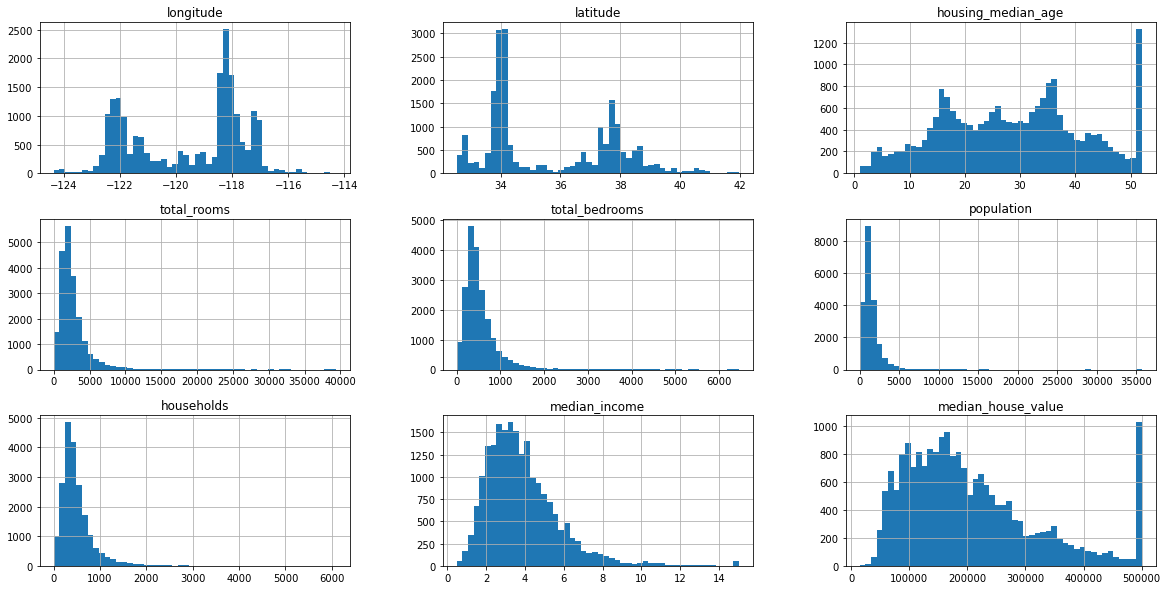

In [159]:
# the other quick way is histogram for each numerical attributes. 
house_data.hist(bins=50, figsize=(20,10))
plt.show()

### **Create a Train/Test Set**

In [160]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(house_data, 0.2)
print(colored('Length of Train Test: ', 'blue'), len(train_set))
print(colored('Length of Test Test: ', 'blue'), len(test_set)) # %20

Length of Train Test:  16512
Length of Test Test:  4128


In [161]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# house_data has no identifier column and the simplest solution is to use row index as ID:
house_with_id = house_data.reset_index() 
train_set, test_set = split_train_test_by_id(house_with_id, 0.2, 'index') 

In [162]:
train_set, test_set = train_test_split(house_data, test_size=0.2, random_state=42)

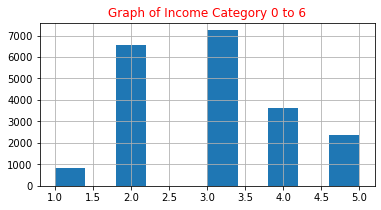

In [163]:
# creating income category using median income --> 1.5 to 6 means  $15,000-$60,000  and 0 to 1.5 means less than $15,000
house_data["income_cat"] = pd.cut(house_data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
house_data["income_cat"].hist(figsize=(6,3));
plt.title('Graph of Income Category 0 to 6', color='r');

In [164]:
# you are ready to do stratified sampling based on the income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house_data, house_data['income_cat']):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]
strat_test_set['income_cat'].value_counts() / len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [165]:
# you should remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### **Exploring the Data**

#### **Visualizing Geographical Data**

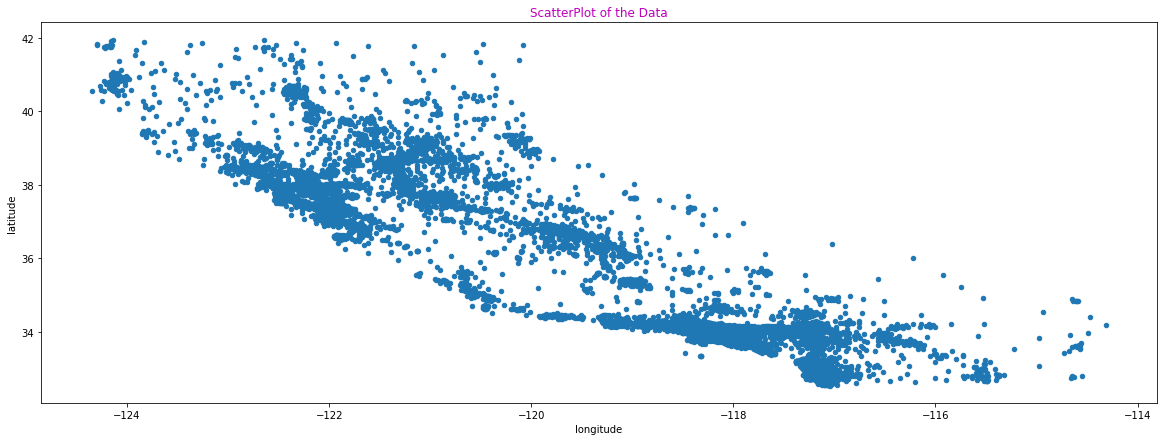

In [166]:
house_data.plot(kind='scatter', x='longitude', y='latitude', figsize=(20,7));
plt.title('ScatterPlot of the Data', color='m');

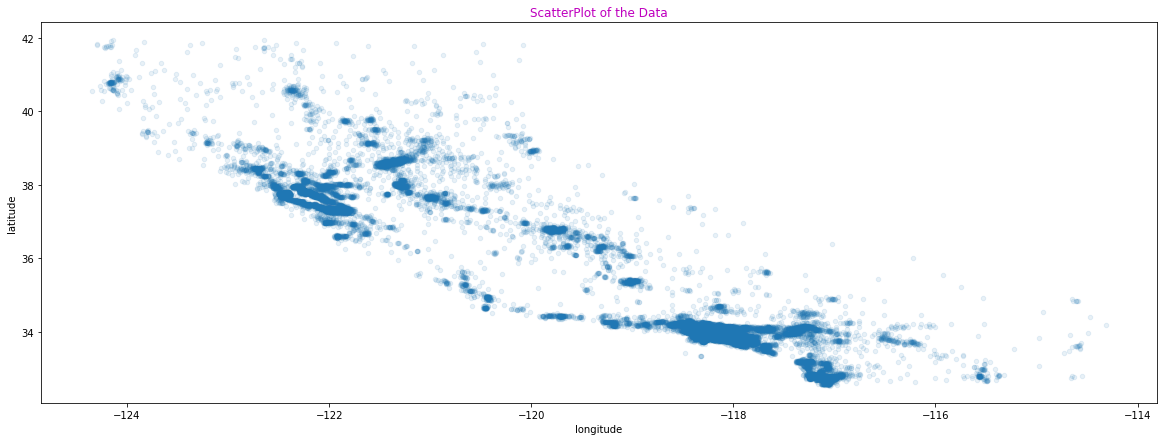

In [167]:
# alpha function makes easier to see the places where are a high density
house_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(20,7));
plt.title('ScatterPlot of the Data', color='m');

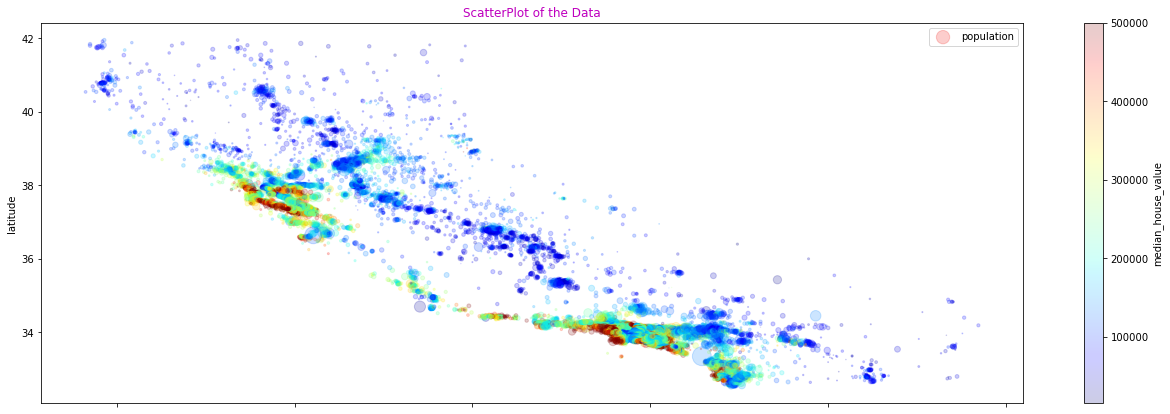

In [168]:
# look at the house prices using predefined color may called jet, which ranges from blue to red (low to high)
house_data.plot(kind='scatter', x='longitude', y='latitude',alpha=0.2, figsize=(22,7),
               s=house_data['population']/100, label='population',
               c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True);
plt.title('ScatterPlot of the Data', color='m');

#### **Looking for Correlations**

In [169]:
# Standart Correlation Coefficient also called Pearson's
corr_house = house_data.corr()
corr_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [170]:
# the corr ranges from -1 to 1. When it's close to 1, it means that there is STRONG POSITIVE CORRELATION
#                               When it's close to -1, it means that there is STRONG NEGATIVE CORRELATION
#                               Finally coefficients close to 0 mean that is no LINEAR CORRELATION
corr_house['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Note:** The correlation coefficient only measures linear correlations (if x goes up, then y generally goes up/down)

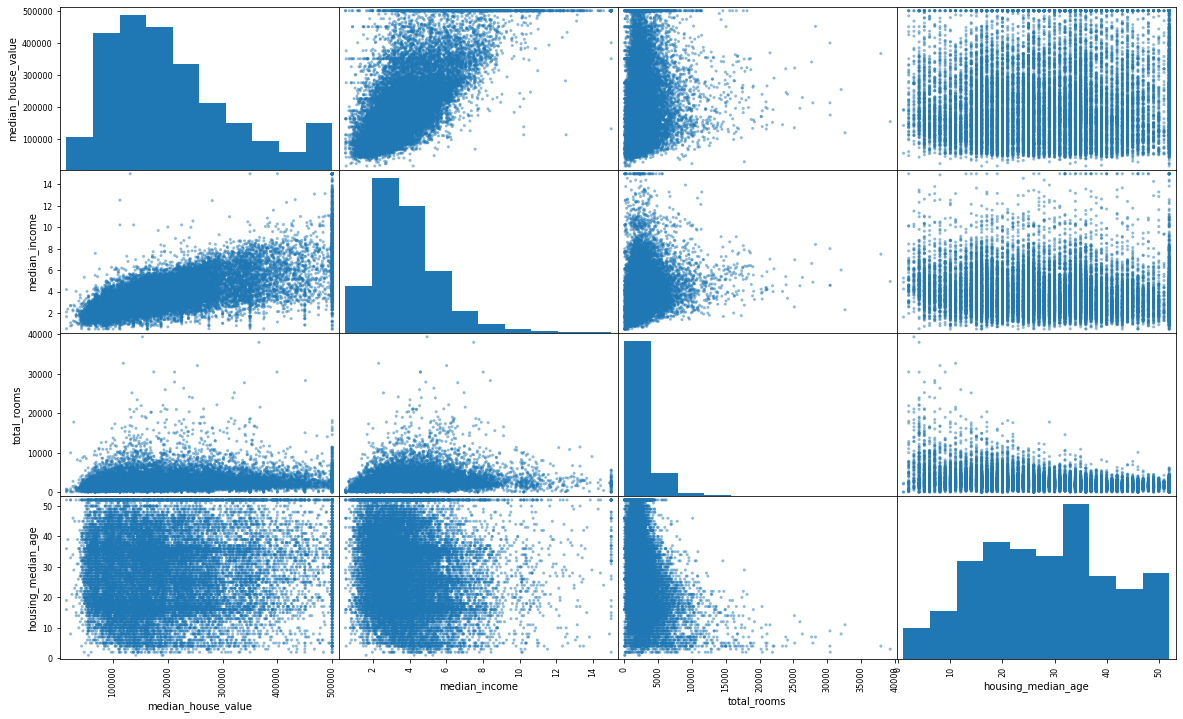

In [171]:
# Another way to check correlation using pandas.plotting
attributes= ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(house_data[attributes], figsize=(20,12));

### **Prepare the Data for Machine Learning**

In [216]:
house_data = strat_train_set.drop('median_house_value', axis=1)
house_labels = strat_train_set['median_house_value'].copy()

#### **Data Cleaning**

we have three options: 
- get rid of corresponding districts
- get rid of the whole attribute
- set the values to some value (zero, mean, median, etc...)

In [173]:
house_data.dropna(subset=['total_bedrooms'])   # option 1 
house_data.drop('total_bedrooms', axis=1)      # option 2
median = house_data['total_bedrooms'].median() # option 3
house_data['total_bedrooms'].fillna(median, inplace=True)
house_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [174]:
imputer = SimpleImputer(strategy="median")
house_number = house_data.drop('ocean_proximity', axis=1)
print(colored('Using SimpleImputer: ', 'blue'), imputer.fit(house_number))
print(colored('Statistic Instance: : ', 'blue'), '\n', imputer.statistics_)
print(colored('House Data Medians: : ', 'blue'), '\n', house_number.median().values)

Using SimpleImputer:  SimpleImputer(strategy='median')
Statistic Instance: :  
 [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
House Data Medians: :  
 [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [175]:
X = imputer.transform(house_number)
house_tr = pd.DataFrame(X, columns=house_number.columns, index=house_number.index)

#### **Handling Text and Categorical Attributes**

In [178]:
house_cat = house_data[['ocean_proximity']]
house_cat. head() # its not arbitrary text.. there are a limited number of possinle values..

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [186]:
ordinal_encoder = OrdinalEncoder()
house_cat_encoded = ordinal_encoder.fit_transform(house_cat)
print(colored('Categories of Ordinal Encoder: ', 'blue'), '\n',  ordinal_encoder.categories_)

Categories of Ordinal Encoder:  
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [191]:
one_hot_encoder = OneHotEncoder()
house_cat_1hot = one_hot_encoder.fit_transform(house_cat)
house_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [196]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        rooms_per_house = X[:, rooms_ix] / X[:, households_ix]
        population_per_house = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_house, population_per_house, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_house, population_per_house]
attr_add = CombinedAttributesAdder(add_bedrooms_per_room = False)
house_extra_attributes = attr_add.transform(house_data.values)

#### **Feature Scalling/Transformation Pipelines**

In [205]:
#  Pipeline constructor takes a list of name/estimator
num_pipeline = Pipeline([('Imputer', SimpleImputer(strategy='median')),
                         ('attr_add', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])
house_num_tr = num_pipeline.fit_transform(house_number) 

In [211]:
num_attribute = list(house_number)
cat_attribute = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribute),('cat', OneHotEncoder(), cat_attribute)])
house_prepared = full_pipeline.fit_transform(house_data)
house_prepared  # it returns dense matrix

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

### **Select and Train Model**

#### **Models**

In [232]:
linear_reg = LinearRegression()
print(colored('Now have a working ', 'blue'), linear_reg.fit(house_prepared, house_labels))
some_data = house_data.iloc[:5]
some_labels = house_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(colored('Predictions: ', 'blue'), linear_reg.predict(some_data_prepared))
print(colored('Labels: ', 'blue'), list(some_labels))

Now have a working  LinearRegression()
Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [224]:
house_predictions = linear_reg.predict(house_prepared)
linear_mse = mean_squared_error(house_labels, house_predictions)
linear_rmse = np.sqrt(linear_mse)
print(colored('Regression Models RMSE on training set is: ', 'blue'), linear_rmse)
# this is an example of a model UNDERFITTING the training data.

Regression Models RMSE on training set is:  68627.87390018745


In [230]:
# This is a powerful model. capable od finding complex nonlinear relationship in the data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(house_prepared, house_labels)
house_predictions = tree_reg.predict(house_prepared)
tree_mse = mean_squared_error(house_labels, house_predictions)
tree_rmse = np.sqrt(tree_mse)
print(colored('Decision Tree Models RMSE on training set is: ', 'blue'), tree_rmse)
# this is an example of a model OVERFITTING the training data.

Decision Tree Models RMSE on training set is:  0.0


#### **Using Cross-Validation**

In [238]:
scores = cross_val_score(tree_reg, house_prepared, house_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores= np.sqrt(-scores)
#print(colored('Decision Tree Models RMSE on training set using Cross Validation is: ', 'blue'), tree_rmse_scores)
def display_scores(scores):
    print(colored('Scores: ', 'blue'), scores)
    print(colored('Mean: ', 'blue'), scores.mean())
    print(colored('Standart Deviation: ', 'blue'), scores.std())
display_scores(tree_rmse_scores)

Scores:  [72742.19849031 70478.85362997 69713.64115249 70909.4056302
 70061.34568777 77823.51927643 71416.67304644 72098.59867145
 69087.7317162  71366.77050845]
Mean:  71569.87378097158
Standart Deviation:  2330.9982320446943


In [241]:
linear_scores = cross_val_score(linear_reg, house_prepared, house_labels, scoring='neg_mean_squared_error', cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores)
# the DECISION TREE  model is OVERFITTING so badly that it performs worsethan the LINEAR REGRESSION model.

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standart Deviation:  2880.328209818065


In [243]:
forest_reg = RandomForestRegressor()
forest_reg.fit(house_prepared, house_labels)
house_predictions = forest_reg.predict(house_prepared)
forest_mse = mean_squared_error(house_labels, house_predictions)
forest_rmse = np.sqrt(forest_mse)
print(colored('Random Forest Models RMSE on training set is: ', 'blue'), forest_rmse)
forest_scores = cross_val_score(forest_reg, house_prepared, house_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Random Forest Models RMSE on training set is:  18729.50955124998
Scores:  [51262.27916791 49269.18829943 46767.79577118 51828.98917727
 47355.63292346 52132.36436735 52721.21498112 49690.15918441
 48616.41250087 54019.5554485 ]
Mean:  50366.35918215013
Standart Deviation:  2273.5302335731326


### **Grid Search**

In [247]:
param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,4,6]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
print(colored('Model: ', 'blue'), grid_search.fit(house_prepared, house_labels))
print(colored('Parameters: ', 'blue'), grid_search.best_params_)
print(colored('Estimators: ', 'blue'), grid_search.best_estimator_)

Model:  GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')
Parameters:  {'max_features': 6, 'n_estimators': 30}
Estimators:  RandomForestRegressor(max_features=6, n_estimators=30)


In [248]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63591.174601172555 {'max_features': 2, 'n_estimators': 3}
55223.867697334616 {'max_features': 2, 'n_estimators': 10}
52870.3694656109 {'max_features': 2, 'n_estimators': 30}
59066.338349615755 {'max_features': 4, 'n_estimators': 3}
52269.37871817145 {'max_features': 4, 'n_estimators': 10}
50085.00866737683 {'max_features': 4, 'n_estimators': 30}
58744.70613572596 {'max_features': 6, 'n_estimators': 3}
52223.646096140415 {'max_features': 6, 'n_estimators': 10}
49908.029983212335 {'max_features': 6, 'n_estimators': 30}
59342.018092561746 {'max_features': 8, 'n_estimators': 3}
52149.83340630601 {'max_features': 8, 'n_estimators': 10}
50216.24936445985 {'max_features': 8, 'n_estimators': 30}
62666.784481215844 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54244.53983762012 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58008.69615346896 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52284.92501699627 {'bootstrap': False, 'max_features': 4, 'n_estimator

### **Analyze Best Models and Their Errors**

In [257]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(colored('Importances:', 'blue'), feature_importances)
print(colored('------------'*8, 'magenta'))
extra_attributes= ['rooms_per_hold','pop_per_hold','bedrooms_per_room']
cat_encoder= full_pipeline.named_transformers_['cat']
cat_one_hot_attributes= list(cat_encoder.categories_[0])
attributes= num_attribute + extra_attributes + cat_one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

Importances: [7.26095161e-02 6.69199486e-02 4.44625046e-02 1.99314514e-02
 1.70301331e-02 1.77369591e-02 1.66000856e-02 3.54051215e-01
 5.14697977e-02 1.03454484e-01 6.96252837e-02 1.07540885e-02
 1.47020442e-01 5.27146585e-05 3.19463857e-03 5.08673695e-03]
------------------------------------------------------------------------------------------------


[(0.35405121534815515, 'median_income'),
 (0.14702044178180823, 'INLAND'),
 (0.1034544844209659, 'pop_per_hold'),
 (0.07260951606050893, 'longitude'),
 (0.06962528365606667, 'bedrooms_per_room'),
 (0.06691994856670211, 'latitude'),
 (0.0514697977307874, 'rooms_per_hold'),
 (0.044462504599037174, 'housing_median_age'),
 (0.019931451372492283, 'total_rooms'),
 (0.017736959091296925, 'population'),
 (0.017030133117530846, 'total_bedrooms'),
 (0.016600085582576467, 'households'),
 (0.010754088490783234, '<1H OCEAN'),
 (0.005086736950148318, 'NEAR OCEAN'),
 (0.003194638572680772, 'NEAR BAY'),
 (5.27146584596031e-05, 'ISLAND')]

### **Evaluate System on Test Set**

In [264]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
Y_test = strat_test_set['median_house_value'].copy() 
X_test_prepared = full_pipeline.transform(X_test)  # you do not want to fit the test set!
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(colored('Final RMSE:', 'blue'), final_rmse)

Final RMSE: 48028.78530805332


In [269]:
confidence = 0.95
squared_errors = (final_predictions - Y_test)**2
print(colored('Result: ', 'blue'), np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                                                            loc=squared_errors.mean(), 
                                                            scale=stats.sem(squared_errors))))

Result:  [46039.34953768 49939.03013156]
